In [2]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
location="Missouri Valley"
Hipsdf=pd.read_csv("/home/schnablelab/Documents/NNSatelliteImages/Data/HYBRID_HIPS_V3.5_ALLPLOTS.csv", sep=",")

In [4]:
Hipsdf.columns

Index(['index', 'qrCode', 'location', 'sublocation', 'irrigationProvided',
       'nitrogenTreatment', 'poundsOfNitrogenPerAcre', 'experiment',
       'plotLength', 'totalStandCount', 'block', 'row', 'range', 'plotNumber',
       'genotype', 'plantingDate', 'anthesisDate', 'silkDate',
       'daysToAnthesis', 'daysToSilk', 'anthesisSilkingInterval',
       'GDDToAnthesis', 'GDDToSilk', 'anthesisSilkingIntervalGDD', 'earHeight',
       'flagLeafHeight', 'plantDensity', 'combineYield', 'yieldPerAcre',
       'combineMoisture', 'combineTestWeight', 'earLength', 'earFillLength',
       'earWidth', 'shelledCobWidth', 'kernelsPerRow', 'kernelRowNumber',
       'kernelsPerEar', 'hundredKernelMass', 'kernelMassPerEar',
       'shelledCobMass', 'percentMoisture', 'percentStarch', 'percentProtein',
       'percentOil', 'percentFiber', 'percentAsh', 'kernelColor',
       'percentLodging', 'harvestDate', 'notes', 'rangeRow'],
      dtype='object')

In [5]:
Hipsdf["location"].value_counts()

location
North Platte3      638
North Platte1      560
North Platte2      560
Ames               536
Lincoln            532
Scottsbluff        525
Crawfordsville     522
Missouri Valley    176
Name: count, dtype: int64

In [6]:
Hipsdf=Hipsdf.loc[(Hipsdf["location"]==location),]# & (Hipsdf["nitrogenTreatment"]=="Low"),]

,index,qrCode,location,sublocation,irrigationProvided,nitrogenTreatment,poundsOfNitrogenPerAcre,experiment,plotLength,totalStandCount,...,percentStarch,percentProtein,percentOil,percentFiber,percentAsh,kernelColor,percentLodging,harvestDate,notes,rangeRow
1590,1480,MV$HYBRID-HIPS$REP2$PLOT1$ROW23$RANGE24$PHP02 ...,Missouri Valley,Missouri Valley,0.0,Medium,175,LC_4211,17.5,63.0,...,67.94,7.83,4.13,1.08,1.10,yellow,0.00,2022-10-11,NaN,24-23
1591,1481,MV$HYBRID-HIPS$REP2$PLOT2$ROW25$RANGE24$PHW52 ...,Missouri Valley,Missouri Valley,0.0,Medium,175,LC_4211,17.5,46.0,...,68.09,8.32,3.99,1.25,1.21,yellow,6.52,2022-10-11,NaN,24-25
1592,1482,MV$HYBRID-HIPS$REP2$PLOT3$ROW27$RANGE24$2369 X...,Missouri Valley,Missouri Valley,0.0,Medium,175,LC_4211,17.5,56.0,...,68.97,8.35,3.95,0.95,1.05,orange,0.00,2022-10-11,NaN,24-27
1593,1483,MV$HYBRID-HIPS$REP2$PLOT4$ROW29$RANGE24$PHG39 ...,Missouri Valley,Missouri Valley,0.0,Medium,175,LC_4211,17.5,57.0,...,69.29,6.95,3.94,1.30,1.18,yellow,8.77,2022-10-11,NaN,24-29
1594,1484,MV$HYBRID-HIPS$REP2$PLOT5$ROW23$RANGE25$LH198 ...,Missouri Valley,Missouri Valley,0.0,Medium,175,LC_4211,17.5,56.0,...,66.72,10.44,4.26,1.32,1.13,yellow,3.57,2022-10-11,NaN,25-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,3,NaN,Missouri Valley,NaN,NaN,NaN,0,LC_4211,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-23
1762,4,NaN,Missouri Valley,NaN,NaN,NaN,0,LC_4211,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28-27
1763,5,NaN,Missouri Valley,NaN,NaN,NaN,0,LC_4211,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-27
1764,6,NaN,Missouri Valley,NaN,NaN,NaN,0,LC_4211,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36-27


In [7]:
Hipsdf['experiment'].value_counts()

experiment
LC_4211    176
Name: count, dtype: int64

In [8]:
Hipsdf=Hipsdf.sort_values(by=["range", "row"])
# Hipsdf[["row", "range","yieldPerAcre"]].to_csv("Ames.csv", index=False)

In [9]:
Hipsdf[['range','row']].describe()

,range,row
count,176.000000,176.000000
mean,23.500000,26.000000
std,12.734655,2.242448
min,2.000000,23.000000
25%,12.750000,24.500000
50%,23.500000,26.000000
75%,34.250000,27.500000
max,45.000000,29.000000


In [10]:
rows=Hipsdf['range'].max()-Hipsdf['range'].min()+1
columns=Hipsdf['row'].max()-Hipsdf['row'].min()+1

print(rows,columns)

44 7


In [11]:
Hipsdf[Hipsdf['yieldPerAcre'].isnull()][['range','row']].values

array([[ 4, 27],
       [13, 25],
       [14, 25],
       [14, 27],
       [15, 23],
       [16, 27],
       [17, 29],
       [20, 29],
       [21, 23],
       [28, 27],
       [31, 27],
       [36, 27],
       [41, 27]])

In [12]:
import seaborn as sns

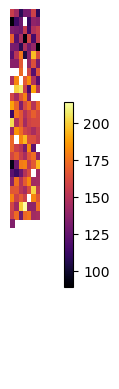

In [12]:
##Ames

df = np.full((rows*22,columns*11), np.nan)

# df = np.zeros((rows*22, columns*11))
stop=df.shape[1]
start_col=0
start_row=0

cols_pix=11
row_pix=22

n=0
count=0
rowcount=0
for trait in Hipsdf.yieldPerAcre.values:
    
   
    # print(trait)
    # for row in range(len(Hipsdf.row.unique())):
    #     for col in range(len(Hipsdf.range.unique())):
    
    if math.isnan(trait):
        df[start_row:row_pix+1,start_col:cols_pix+1,]=np.nan####( or 0 if I want to assign zero)
        count=count+1
        # print(count)
    else:
        df[start_row:row_pix+1,start_col:cols_pix+1]=trait
    # print(df[start_row:row_pix, start_col:cols_pix].shape)
    rowcount+=1
    # print(rowcount)

            
    start_col=cols_pix
    cols_pix+=11
    # print(cols_pix)
    
    if cols_pix==(stop+11):
        start_row=row_pix
        row_pix+=22
        start_col=0
        cols_pix=11
    n+=1
    
    # print(start_row, row_pix, start_col, cols_pix)
            
# print(count)
# plt.imshow(df)
# plt.savefig('out.png', bbox_inches='tight', pad_inches=0)
# print(n)
plt.axis('off')
# plt.figure(figsize=(10,5))
ax=plt.imshow(df,interpolation='nearest', cmap="inferno")
colorbar = plt.colorbar(shrink=0.5) 
# ax.invert_xaxis()
# mask=np.isnan(df)
# heatmap=sns.heatmap(df, yticklabels=False, xticklabels=False, center=True)
# plt.gca().set_aspect(1.2, adjustable='box')
# colorbar = plt.colorbar(heatmap,shrink=0.5) 
plt.savefig('Ames_4233.png', dpi=300, bbox_inches='tight', pad_inches=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
176


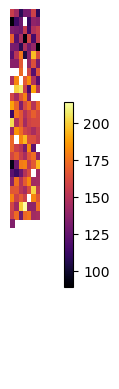

In [13]:
##Crawfordsville

df = np.full((rows*22,columns*11), np.nan)

# df = np.zeros((rows*22, columns*11))
stop=df.shape[1]
start_col=0
start_row=0

cols_pix=11
row_pix=22

n=0
count=0
rowcount=0
for trait in Hipsdf.yieldPerAcre.values:
    
   
    # print(trait)
    # for row in range(len(Hipsdf.row.unique())):
    #     for col in range(len(Hipsdf.range.unique())):
    
    if math.isnan(trait):
        df[start_row:row_pix+1,start_col:cols_pix+1,]=np.nan####( or 0 if I want to assign zero)
        count=count+1
        print(count)
    else:
        df[start_row:row_pix+1,start_col:cols_pix+1]=trait
    # print(df[start_row:row_pix, start_col:cols_pix].shape)
    rowcount+=1
    # print(rowcount)

            
    start_col=cols_pix
    cols_pix+=11
    # print(cols_pix)
    
    if cols_pix==(stop+11):
        start_row=row_pix
        row_pix+=22
        start_col=0
        cols_pix=11
    n+=1
    
    # print(start_row, row_pix, start_col, cols_pix)
            
# print(count)
# plt.imshow(df)
# plt.savefig('out.png', bbox_inches='tight', pad_inches=0)
print(n)
plt.axis('off')
# plt.figure(figsize=(10,5))
ax=plt.imshow(df,interpolation='nearest', cmap="inferno")
colorbar = plt.colorbar(shrink=0.5) 
# ax.invert_xaxis()
# mask=np.isnan(df)
# heatmap=sns.heatmap(df, yticklabels=False, xticklabels=False, center=True)
# plt.gca().set_aspect(1.2, adjustable='box')
# colorbar = plt.colorbar(heatmap,shrink=0.5) 
plt.savefig('Crawfordsville_4353.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [227]:
stop

88

176


/tmp/ipykernel_953167/1226893541.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([round(c) for c in sbarticks])


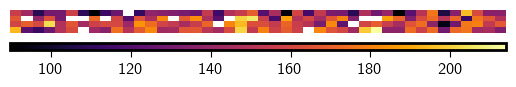

In [37]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Nimbus Sans",
    "font.size":12,
    'axes.linewidth':2,
    'xtick.major.size':5,
    'ytick.major.size':5,
    'ytick.major.width':2
})


##Missorurivalley

# df = np.full((rows*22,columns*11), np.nan)

df = np.zeros((4*11, rows*22))
stop=df.shape[1]
start_col=0
start_row=0

cols_pix=22
row_pix=11

n=0
count=0
rowcount=0
for trait in Hipsdf.yieldPerAcre.values:
    
   
    # print(trait)
    # for row in range(len(Hipsdf.row.unique())):
    #     for col in range(len(Hipsdf.range.unique())):
    
    if math.isnan(trait):
        df[start_row:row_pix+1,start_col:cols_pix+1,]=np.nan####( or 0 if I want to assign zero)
        count=count+1
        # print(count)
    else:
        df[start_row:row_pix+1,start_col:cols_pix+1]=trait
    # print(df[start_row:row_pix, start_col:cols_pix].shape)
    rowcount+=1
    # print(rowcount)

            
    start_col=cols_pix
    cols_pix+=22
    # print(cols_pix)
    
    if cols_pix==(stop+22):
        start_row=row_pix
        row_pix+=11
        start_col=0
        cols_pix=22
    n+=1
    
    # print(start_row, row_pix, start_col, cols_pix)
            
# print(count)
# plt.imshow(df)
# plt.savefig('out.png', bbox_inches='tight', pad_inches=0)

from mpl_toolkits.axes_grid1 import make_axes_locatable
print(n)
plt.axis('off')
# plt.figure(figsize=(10,5))

ax = plt.gca()
im=plt.imshow(df,interpolation='nearest', cmap="inferno")

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="35%", pad=0.1)

cbar=plt.colorbar(im,orientation="horizontal", cax=cax) 

sbarticks=cbar.get_ticks()
cbar.set_ticklabels([round(c) for c in sbarticks])
# cbar.ax.set_aspect(5)  
# mask=np.isnan(df)
# heatmap=sns.heatmap(df, yticklabels=False, xticklabels=False, center=True)
# plt.gca().set_aspect(1.2, adjustable='box')
# colorbar = plt.colorbar(heatmap,shrink=0.5) 
plt.savefig('Figure2/Movalley_all.svg', dpi=350, bbox_inches='tight')

array([ 80., 100., 120., 140., 160., 180., 200., 220.])

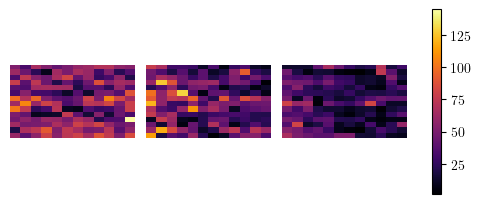

In [318]:
##Lincoln

df = np.full((rows*11,columns*22), np.nan)


stop=df.shape[1]
start_col=0
start_row=0

cols_pix=22
row_pix=11

n=0
count=0
rowcount=0
for trait in Hipsdf.yieldPerAcre.values:
    rowcount+=1
    # print(rowcount)
    # print(trait)
    # for row in range(len(Hipsdf.row.unique())):
    #     for col in range(len(Hipsdf.range.unique())):
    
    if math.isnan(trait):
        df[start_row:row_pix+1, start_col:cols_pix+1]=np.nan ####( or 0 if I want to assign zero)
        count=count+1
        # print(count)
    else:
        df[start_row:row_pix+1, start_col:cols_pix+1]=trait
    # print(df[start_row:row_pix, start_col:cols_pix].shape)
    

            
    start_col=cols_pix
    cols_pix+=22
    # print(cols_pix)
    
    if cols_pix==(stop+22):
        start_row=row_pix
        row_pix+=11
        start_col=0
        cols_pix=22
    n+=1
    
    # print(start_row, row_pix, start_col, cols_pix)
            
# print(count)
# plt.imshow(df)
# plt.savefig('out.png', bbox_inches='tight', pad_inches=0)
plt.axis('off')
# plt.figure(figsize=(10,5))
ax=plt.imshow(df,interpolation='nearest', cmap="inferno")
colorbar = plt.colorbar(shrink=0.5)
# mask=np.isnan(df)
# heatmap=sns.heatmap(df, yticklabels=False, xticklabels=False, center=True)
plt.savefig('Lincoln_all.png', dpi=300, bbox_inches='tight', pad_inches=0)

13


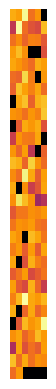

In [233]:
##########################Very first codde written#########################33


df = np.zeros((660,66))

start_col=0
start_row=0

cols_pix=11
row_pix=22

n=0
count=0
for trait in Hipsdf.yieldPerAcre.values:
    # print(trait)
    # for row in range(len(Hipsdf.row.unique())):
    #     for col in range(len(Hipsdf.range.unique())):
    
    if math.isnan(trait):
        df[start_row:row_pix+1, start_col:cols_pix+1]=0
        count=count+1
        # print(count)
    else:
        df[start_row:row_pix+1, start_col:cols_pix+1]=trait
    # print(df[start_row:row_pix, start_col:cols_pix].shape)
    

            
    start_col=cols_pix
    cols_pix+=11
    # print(cols_pix)
    
    if cols_pix==77:
        start_row=row_pix
        row_pix+=22
        start_col=0
        cols_pix=11
    n+=1
    
    # print(start_row, row_pix, start_col, cols_pix)
            
print(count)
# plt.imshow(df)
# plt.savefig('out.png', bbox_inches='tight', pad_inches=0)

plt.axis('off')
plt.imshow(df,interpolation='nearest', cmap="inferno")
# plt.savefig('Crawfordsville_LC_4352.png', dpi=300, bbox_inches='tight', pad_inches=0)

<Axes: >

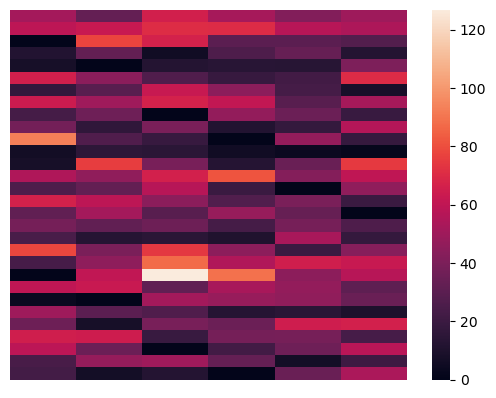

In [40]:


sns.heatmap(df, yticklabels=False, xticklabels=False)

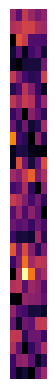

In [36]:
plt.axis('off')
plt.imshow(df,interpolation='nearest', cmap="inferno")
# plt.savefig('Crawfordsville_mediumNitrogen.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [19]:
Dataframe=pd.DataFrame(df)
Dataframe.to_csv("yieldmap.csv", index=False)

In [49]:
# height, width = 22, 11
# df = pd.DataFrame(index=range(1, height + 1), columns=range(1, width + 1))

# for i in ranges:
#     for j in rows:
#         for index, rownum in Hipsdf.iterrows():
#             if rownum["row"] == j and rownum["range"] == i:
#                 # Calculate the appropriate index in the DataFrame based on j and i
#                 row_index = (j - 1) * height + 1
#                 col_index = (i - 1) * width + 1
#                 print(f"Processing row {j}, range {i}, row_index {row_index}, col_index {col_index}")

#                 # Populate the values in the DataFrame for the specified range and row
#                 for h in range(row_index, row_index + height):
#                     for w in range(col_index, col_index + width):
#                         print(f"  Setting value for cell ({h}, {w})")
#                         df.loc[h, w] = rownum["yieldPerAcre"]

# # Print the resulting DataFrame
# print(df)
